In [1]:
import whisper
import os
import torch
import pandas as pd

In [2]:
# load large model use gpu 0
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
model = whisper.load_model("large")

In [4]:
path = "/dtu/blackhole/1f/137151/ftspeech/audio/2010"
all_files = os.listdir(path)

In [8]:
all_files

['20101_M005.wav',
 '20101_M039.wav',
 '20101_M023.wav',
 '20101_M020.wav',
 '20101_M038.wav',
 '20101_M079.wav',
 '20101_M046.wav',
 '20101_M085.wav',
 '20102_M002.wav',
 '20101_M022.wav',
 '20101_M007.wav',
 '20101_M102.wav',
 '20101_M063.wav',
 '20101_M093.wav',
 '20101_M094.wav',
 '20101_M037.wav',
 '20101_M052.wav',
 '20101_M092.wav',
 '20101_M095.wav',
 '20101_M098.wav',
 '20101_M015.wav',
 '20101_M042.wav',
 '20101_M091.wav',
 '20101_M099.wav',
 '20101_M062.wav',
 '20101_M065.wav',
 '20101_M088.wav',
 '20101_M031.wav',
 '20101_M106.wav',
 '20101_M016.wav',
 '20101_M036.wav',
 '20101_M001.wav',
 '20101_M055.wav',
 '20101_M061.wav',
 '20101_M048.wav',
 '20101_M049.wav',
 '20101_M032.wav',
 '20101_M087.wav',
 '20101_M034.wav',
 '20101_M004.wav',
 '20101_M067.wav',
 '20101_M089.wav',
 '20101_M024.wav',
 '20101_M097.wav',
 '20101_M070.wav',
 '20101_M056.wav',
 '20101_M081.wav',
 '20101_M033.wav',
 '20101_M040.wav',
 '20101_M054.wav',
 '20101_M108.wav',
 '20101_M078.wav',
 '20101_M030

In [68]:
transcription = model.transcribe(f'{path}/20101_M001.wav', **{'language':'da', 'fp16' : True} )

In [69]:
df = pd.DataFrame(transcription['segments'])

In [70]:
df.to_csv('transcription.csv', index=False)

In [124]:
df = pd.read_csv('transcription.csv', converters={'tokens': pd.eval})

In [125]:
df

,id,seek,start,end,text,tokens,temperature,avg_logprob,compression_ratio,no_speech_prob
0,0,6000,60.0,80.0,Mødet er åbnet.,"[376, 6715, 17863, 1189, 8841, 65, 7129, 13]",0.2,-0.306030,1.241667,0.620982
1,1,6000,80.0,88.0,I henhold til grundloven er Folketinget på de...,"[286, 22253, 4104, 8440, 30886, 752, 553, 1189...",0.2,-0.306030,1.241667,0.620982
2,2,8800,88.0,96.0,"Som det medlem, der længst har siddet i tinge...","[12297, 1141, 1205, 10386, 11, 1163, 44584, 87...",0.0,-0.235073,1.658915,0.003063
3,3,8800,96.0,105.0,Til formand har samtlige grupper ved undtalse...,"[45141, 1254, 474, 2233, 3247, 83, 75, 3969, 6...",0.0,-0.235073,1.658915,0.003063
4,4,8800,105.0,110.0,hvis ingen begiver afstemning ved at betragte...,"[45427, 21600, 4612, 1837, 3238, 1099, 773, 14...",0.0,-0.235073,1.658915,0.003063
...,...,...,...,...,...,...,...,...,...,...
602,602,443900,4439.0,4449.0,Danmark leve! Hurra! Hurra! Hurra!,"[3394, 5638, 33076, 0, 8598, 424, 0, 8598, 424...",0.0,-0.101939,2.156250,0.003393
603,603,443900,4449.0,4459.0,Danmark leve! Hurra! Hurra! Hurra!,"[3394, 5638, 33076, 0, 8598, 424, 0, 8598, 424...",0.0,-0.101939,2.156250,0.003393
604,604,445900,4459.0,4469.0,Danmark leve! Hurra! Hurra! Hurra!,"[3394, 5638, 33076, 0, 8598, 424, 0, 8598, 424...",0.0,-0.086157,2.156250,0.008694
605,605,445900,4469.0,4479.0,Danmark leve! Hurra! Hurra! Hurra!,"[3394, 5638, 33076, 0, 8598, 424, 0, 8598, 424...",0.0,-0.086157,2.156250,0.008694


In [126]:
df_longer_segments = pd.DataFrame()
# combine segments into 1 minute chunks and save in df_longer_segments
clean_segment = {
    'start': 0,
    'end': 0,
    'duration': 0,
    'text': '',
    'tokens': []
}
temp_segment = clean_segment.copy()
for index, row in df.iterrows():
    if temp_segment['start'] == 0:
        temp_segment['start'] = row['start']
        temp_segment['end'] = row['end']
        temp_segment['duration'] = row['end'] - row['start']
        temp_segment['text'] = row['text']
        temp_segment['tokens'] = row['tokens'].copy()
    elif row['end'] - temp_segment['start'] < 60:
        temp_segment['end'] = row['end']
        temp_segment['duration'] = row['end'] - temp_segment['start']
        temp_segment['text'] += row['text']
        temp_segment['tokens'] += row['tokens'].copy()
    else:
        df_longer_segments = df_longer_segments.append(temp_segment, ignore_index=True)
        temp_segment = clean_segment.copy()

/tmp/ipykernel_19784/829619178.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_longer_segments = df_longer_segments.append(temp_segment, ignore_index=True)
/tmp/ipykernel_19784/829619178.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_longer_segments = df_longer_segments.append(temp_segment, ignore_index=True)
/tmp/ipykernel_19784/829619178.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_longer_segments = df_longer_segments.append(temp_segment, ignore_index=True)
/tmp/ipykernel_19784/829619178.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_longer_segments = df_longer_segments.append(temp_segment, ignore_

In [127]:
df_longer_segments['len_text'] = df_longer_segments['text'].apply(lambda x: len(x.strip().split(' ')))
df_longer_segments['len_tokens'] = df_longer_segments['tokens'].apply(lambda x: len(x))

(array([ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  8.,  0.,  0.,  0.,  0.,
         0., 18.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  0.,  1.,  1.,  1.,  3.,  1.,  1.,  3.,  2.,  4.,
         1.,  2.,  0.,  0.,  3.,  3.,  2.,  0.,  3.,  2.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 29.  ,  31.44,  33.88,  36.32,  38.76,  41.2 ,  43.64,  46.08,
         48.52,  50.96,  53.4 ,  55.84,  58.28,  60.72,  63.16,  65.6 ,
         68.04,  70.48,  72.92,  75.36,  77.8 ,  80.24,  82.68,  85.12,
         87.56,  90.  ,  92.44,  94.88,  97.32,  99.76, 102.2 , 104.64,
        107.08, 109.52, 111.96, 114.4 , 116.84, 119.28, 121.72, 124.16,
        126.6 , 129.04, 131.48, 133.92, 136.36, 138.8 , 141.24, 143.68,
  

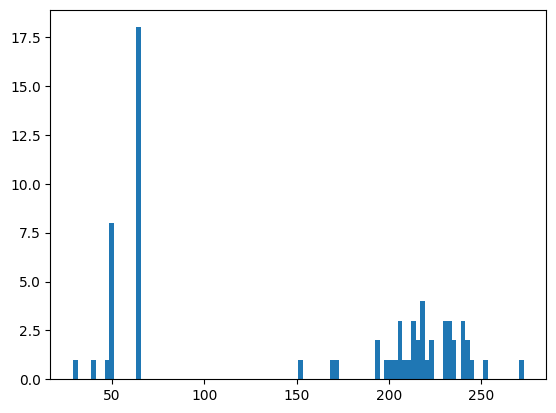

In [128]:
# make histogram of durations
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df_longer_segments['len_tokens'], bins=100)